In [12]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Data Preprocessing:

In [14]:
df = pd.read_csv('anime.csv')

In [15]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [16]:
df.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [18]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [19]:
df['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Hentai, Parody, Sci-Fi                                    1
Hentai, Historical, Mystery                               1
Action, Comedy, Hentai                                    1
Comedy, Ecchi, Fantasy, Parody, Yuri                      1
Action, Mecha, Military, School, Sci-Fi, Super Power      1
Name: count, Length: 3264, dtype: int64

In [20]:
df['genre'].describe()

count      12232
unique      3264
top       Hentai
freq         823
Name: genre, dtype: object

In [21]:
df['genre'] = df['genre'].fillna('Unknown') #i am replacing null genre with most frequent genre in the genre category 
# we can use apriori here to be more specfic with the genre like we have hentai combination with other genres too.
# in my opinion it is best to drop them for the bettermenrt for othe valid dataset since 0.5% of the data 

In [22]:

(62/12294)* 100 

0.504311046038718

In [23]:
df['genre'].count()

np.int64(12294)

In [24]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [25]:
df['type'].describe()


count     12269
unique        6
top          TV
freq       3787
Name: type, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [27]:
df2 = df.dropna(subset=['type'])

In [28]:
df['rating']

0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
         ... 
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, Length: 12294, dtype: float64

In [29]:
df['rating'].isnull().sum()

np.int64(230)

In [30]:
df['rating'].describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [31]:
df['rating'].median()

6.57

In [32]:

df['rating'].mode()  # mode 

0    6.0
Name: rating, dtype: float64

In [33]:
df['rating'].skew()

np.float64(-0.5435700688578501)

<Axes: >

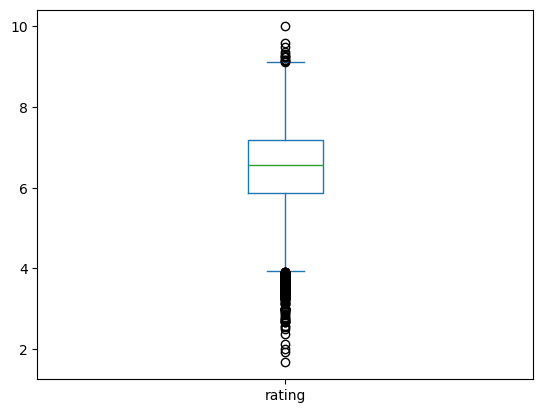

In [34]:
df['rating'].plot(kind ='box')

In [35]:
df['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
2.98      1
3.44      1
1.92      1
2.86      1
3.14      1
Name: count, Length: 598, dtype: int64

In [36]:
# Ensure numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Fill null with median (correct way)
df['rating'] = df['rating'].fillna(df['rating'].median())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [38]:
df3 = df.dropna(subset=['type'])

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12269 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12269 non-null  int64  
 1   name      12269 non-null  object 
 2   genre     12269 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12269 non-null  object 
 5   rating    12269 non-null  float64
 6   members   12269 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 766.8+ KB


In [40]:
df3.to_csv('Cleaned_data.csv', index = False)

In [41]:
df3[df3['anime_id'] == 34492] # i guess the episode unknow should not create any problem in recomendation system 
# since genre , type , rating and members plays important role compare to episode.

,anime_id,name,genre,type,episodes,rating,members
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,6.57,392


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12269 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12269 non-null  int64  
 1   name      12269 non-null  object 
 2   genre     12269 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12269 non-null  object 
 5   rating    12269 non-null  float64
 6   members   12269 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 766.8+ KB


In [43]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("cleaned_data.csv")

In [44]:
# Feature Extraction:
# Convert genres to list
df['genre'] = df['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else ['Unknown'])

# One-hot encoding for genres
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_, index=df.index)

# Combine with rating
df_features = pd.concat([genre_features, df[['rating']]], axis=1)

# Normalize rating
scaler = StandardScaler()
df_features['rating'] = scaler.fit_transform(df_features[['rating']])

In [45]:
# 3. Recommendation System:

# Cosine similarity matrix
similarity_matrix = cosine_similarity(df_features)

# Function to recommend anime
def recommend_anime(anime_title, top_n=5, threshold=0.2):
    if anime_title not in df['name'].values:
        return f"Anime '{anime_title}' not found in dataset."
    
    idx = df[df['name'] == anime_title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Apply threshold
    sim_scores = [(i, score) for i, score in sim_scores if score >= threshold]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the anime itself
    sim_scores = [s for s in sim_scores if s[0] != idx][:top_n]
    
    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices].tolist()

# Example Recommendation
print("Recommendations for 'Naruto':", recommend_anime("Naruto", top_n=5))

Recommendations for 'Naruto': ['Naruto: Shippuuden', 'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi', 'Boruto: Naruto the Movie', 'Naruto x UT', 'Naruto: Shippuuden Movie 4 - The Lost Tower']


In [47]:
# 4. Evaluation (Simple Version)

# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Dummy evaluation: precision & recall based on genre overlap
def evaluate():
    relevant = 0
    recommended = 0
    possible = 0
    
    for _, row in test_df.iterrows():
        recs = recommend_anime(row['name'], top_n=5)
        if isinstance(recs, list):
            recommended += len(recs)
            possible += 5
            overlap = len(set(recs).intersection(set(train_df['name'].values)))
            relevant += overlap
    
    precision = relevant / recommended if recommended > 0 else 0
    recall = relevant / possible if possible > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0
    
    return precision, recall, f1

precision, recall, f1 = evaluate()
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Precision: 0.80, Recall: 0.80, F1: 0.80


In [49]:
'''Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
Sol:  User-Based Collaborative Filtering (UBCF) recommends items to a user based on the preferences of other users who are similar. It first
identifies users with similar behavior or rating patterns, and then suggests items that those similar users have liked but the target user hasn’t 
seen yet.
For example, if User A and User B have rated many movies similarly, and User B liked a movie that User A hasn’t watched, that movie might be 
recommended to User A.

Item-Based Collaborative Filtering (IBCF), on the other hand, focuses on the similarity between items rather than users. It finds items that are 
similar based on user ratings and recommends items that are similar to those the user has already liked or interacted with.
For example, if a user liked Inception, and Interstellar has similar ratings from other users, the system will recommend Interstellar.

In simple terms, user-based CF looks for people like you, while item-based CF looks for items like the ones you like.
User-based CF can struggle when there are many users because finding similar users becomes computationally expensive. Item-based CF is 
often more scalable since item similarities don’t change as frequently and can be precomputed.'''

'Interview Questions:\n1. Can you explain the difference between user-based and item-based collaborative filtering?\nSol:  User-Based Collaborative Filtering (UBCF) recommends items to a user based on the preferences of other users who are similar. It first\nidentifies users with similar behavior or rating patterns, and then suggests items that those similar users have liked but the target user hasn’t \nseen yet.\nFor example, if User A and User B have rated many movies similarly, and User B liked a movie that User A hasn’t watched, that movie might be \nrecommended to User A.'

In [50]:
'''2. What is collaborative filtering, and how does it work?
Sol: Collaborative filtering is a recommendation technique used to suggest items (like movies, products, or songs) to users based on the 
preferences and behaviors of other users.

It works on the idea that people who agreed in the past tend to agree again in the future. In other words, if two users have rated or liked
many of the same items, they are likely to have similar tastes, so one user’s preferences can be used to predict what the other might like.

There are two main types of collaborative filtering:
User-Based Collaborative Filtering – Finds users who are similar to the target user and recommends items that those similar users liked.
Example: If you and another user both liked “The Matrix” and “Inception,” and the other user also liked “Interstellar,” then “Interstellar”
might be recommended to you.

Item-Based Collaborative Filtering – Finds items that are similar based on user interactions and recommends those similar items.
Example: If many users who liked “Inception” also liked “Interstellar,” then “Interstellar” will be recommended when you watch or rate “Inception.”

The system usually measures similarity using metrics such as cosine similarity, Pearson correlation, or Euclidean distance between users or items.
Once similarities are calculated, it predicts ratings or preferences and recommends the top items the user hasn’t interacted with yet.'''

'2. What is collaborative filtering, and how does it work?\nSol: Collaborative filtering is a recommendation technique used to suggest items (like movies, products, or songs) to users based on the \npreferences and behaviors of other users.\n\nIt works on the idea that people who agreed in the past tend to agree again in the future. In other words, if two users have rated or liked\nmany of the same items, they are likely to have similar tastes, so one user’s preferences can be used to predict what the other might like.\n\nThere are two main types of collaborative filtering:\nUser-Based Collaborative Filtering – Finds users who are similar to the target user and recommends items that those similar users liked.\nExample: If you and another user both liked “The Matrix” and “Inception,” and the other user also liked “Interstellar,” then “Interstellar”\nmight be recommended to you.\n\nItem-Based Collaborative Filtering – Finds items that are similar based on user interactions and recommends